# Q1

## Import useful modules

In [5]:
#useful modules

import cv2
from PIL import Image     #Python Imaging Library
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# Read image

In [6]:
#read image in BGR form and convert it to gray 
img = cv2.cvtColor(cv2.imread('fig1.jpg'), cv2.COLOR_BGR2GRAY)
print(type(img))
print(img.size)
print(img.shape)
#print(img)

<class 'numpy.ndarray'>
213600
(400, 534)


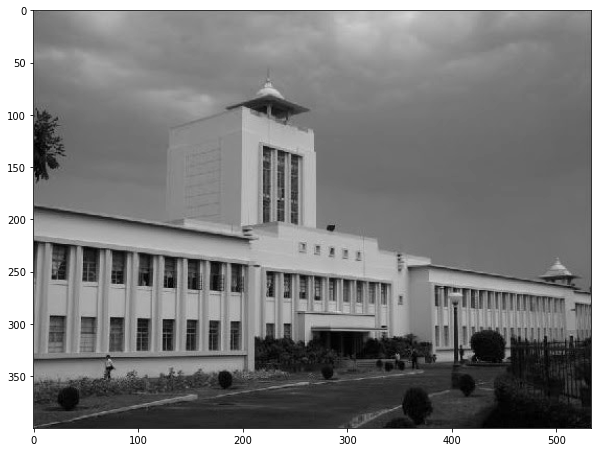

In [9]:
plt.imshow(img,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [10]:
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Downsampling

In [11]:
#Downsampling.............

scale_factor = 1/2
width = int(img.shape[1] * scale_factor)
height = int(img.shape[0] * scale_factor)
dim = (width, height)

downsampled_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print(type(downsampled_img))
print(downsampled_img.size)
print(downsampled_img.shape)

<class 'numpy.ndarray'>
53400
(200, 267)


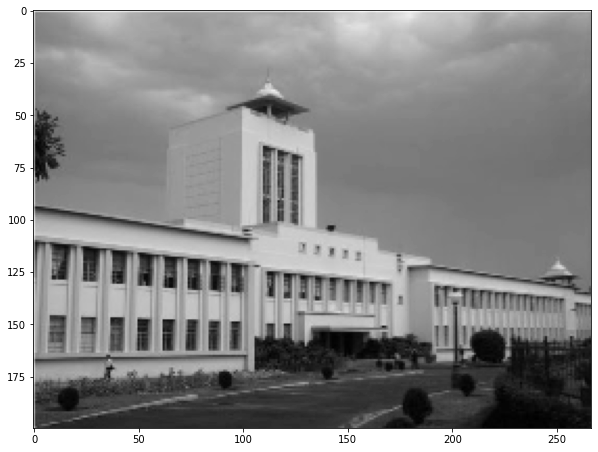

In [12]:
plt.imshow(downsampled_img,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [13]:
#cv2.imshow('downsampled_img',downsampled_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Upsampling

In [14]:
#Upsampling.............

scale_factor = 2
width = int(img.shape[1] * scale_factor)
height = int(img.shape[0] * scale_factor)
dim = (width, height)

upsampled_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print(type(upsampled_img))
print(upsampled_img.size)
print(upsampled_img.shape)

<class 'numpy.ndarray'>
854400
(800, 1068)


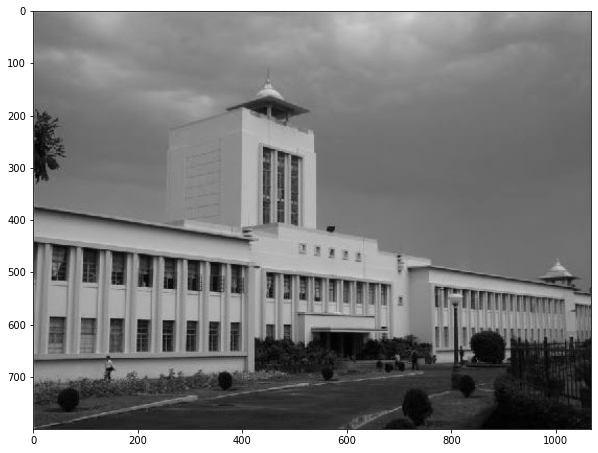

In [15]:
plt.imshow(upsampled_img,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [16]:
#cv2.imshow('upsampled_img',upsampled_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# quantization

In [17]:
#quantization
pil_img = Image.open('fig1.jpg')
print(type(pil_img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


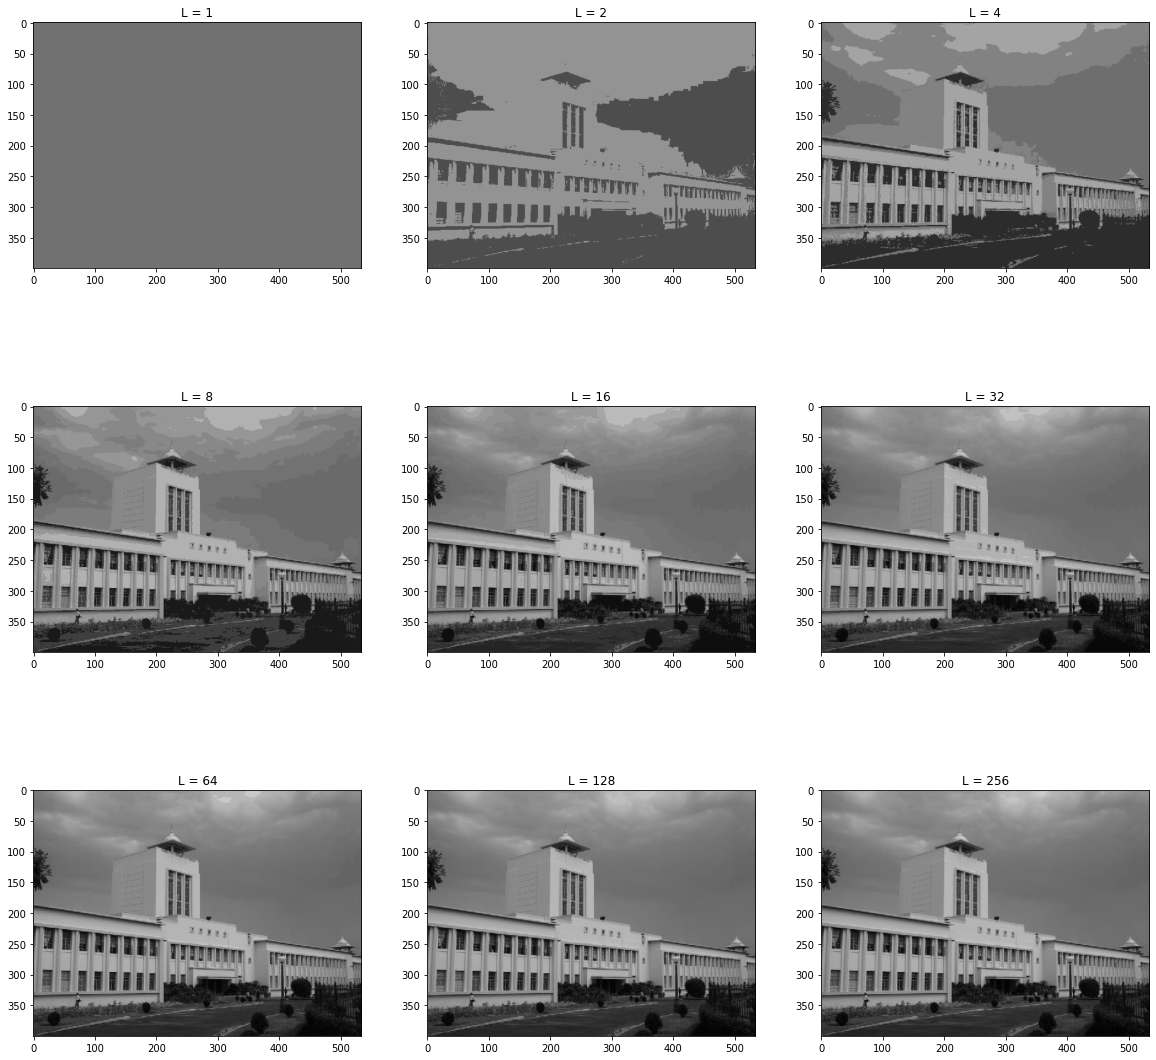

In [19]:
fig, ax = plt.subplots(3,3)
for i in range(0,9):
    q_level = 2**(i)
    x = i//3
    y = i%3
    q_pil_img = pil_img.quantize(q_level)
    ax[x,y].imshow(q_pil_img)
    ax[x,y].set_title('L = '+str(q_level))

plt.rcParams["figure.figsize"]=20,20
plt.show()

# Q2

# Read image

In [20]:
img2 = cv2.cvtColor(cv2.imread('baboon.jpg'), cv2.COLOR_BGR2GRAY)
print(type(img2))
print(img2.size)
print(img2.shape)

<class 'numpy.ndarray'>
65536
(256, 256)


## Mean and Variance of image

In [21]:
mean_fig1 = np.mean(img)
var_fig1 = np.var(img)
print("For figure 1")
print("mean =",mean_fig1)
print("var =",var_fig1)

mean_fig2 = np.mean(img2)
var_fig2 = np.var(img2)
print("For figure 2")
print("mean =",mean_fig2)
print("var =",var_fig2)

For figure 1
mean = 112.94784176029962
var = 2132.1994377577316
For figure 2
mean = 128.95094299316406
var = 1839.0682263446506


## Add noice

In [22]:
noice1 = np.random.normal(0,20,img.shape)
noice2 = np.random.normal(0,20,img2.shape)

In [23]:
# img1_noice = cv2.add(img,noice1)
# img2_noice = cv2.add(img2,noice2)

#or

img1_noice = img + noice1
img2_noice = img2 + noice2

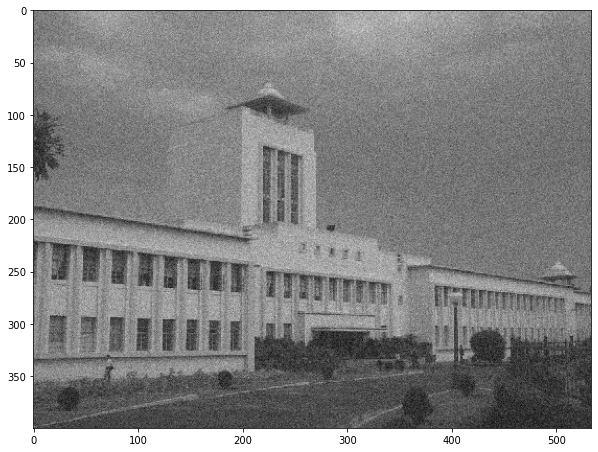

In [25]:
plt.imshow(img1_noice,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

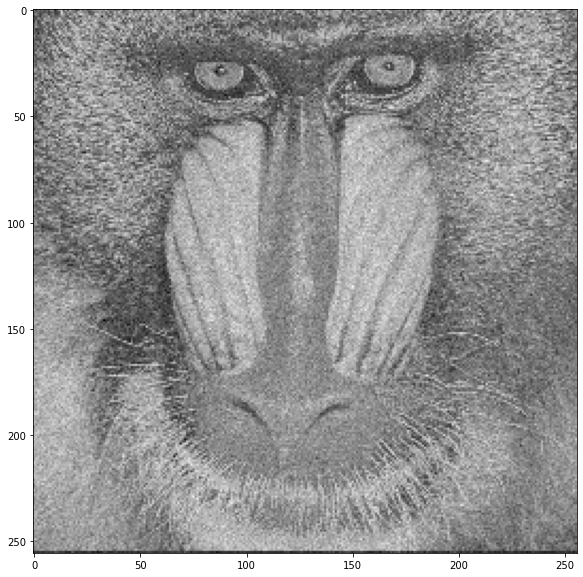

In [27]:
plt.imshow(img2_noice,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

## Mean and Variance of noisy image

In [28]:
mean_fig1_noice = np.mean(img1_noice)
var_fig1_noice = np.var(img1_noice)
print("For figure 1 + noice")
print("mean =",mean_fig1_noice)
print("var =",var_fig1_noice)

mean_fig2_noice = np.mean(img2_noice)
var_fig2_noice = np.var(img2_noice)
print("For figure 2 + noice")
print("mean =",mean_fig2_noice)
print("var =",var_fig2_noice)

For figure 1 + noice
mean = 112.9189852813013
var = 2534.3633713305153
For figure 2 + noice
mean = 128.94243197757444
var = 2230.347164998693


## Mean image of multipal noisy images

In [29]:
final_img = np.zeros(img.shape)
for i in range(200):
    noice = np.random.normal(0,100,img.shape)
#     temp_img = cv2.add(img,noice)
#     final_img = cv2.add(final_img,temp_img)
    temp_img = img + noice
    final_img += temp_img 
final_img //= 200

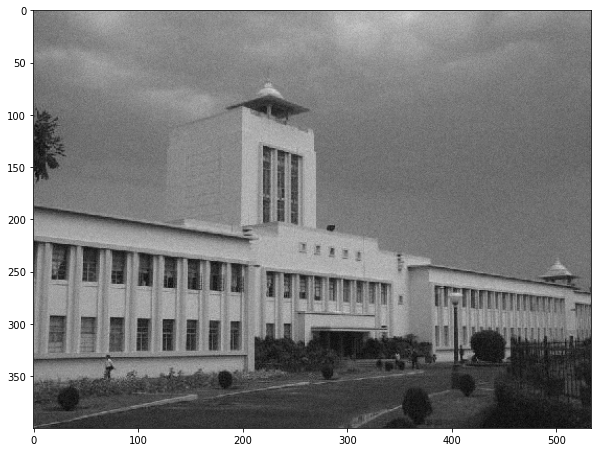

In [30]:
plt.imshow(final_img,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

# Q3

## Read image

<class 'numpy.ndarray'>
38400
(160, 240)


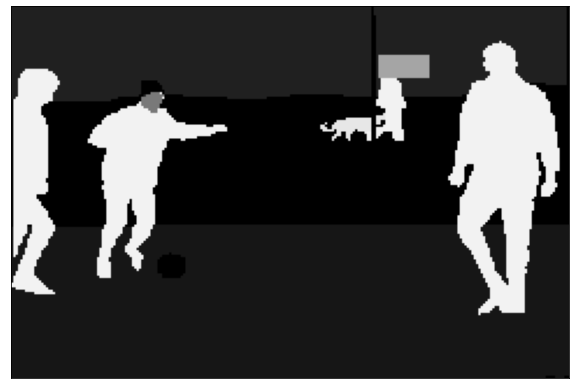

In [31]:
img3 = cv2.cvtColor(cv2.imread('cc.jpg'), cv2.COLOR_BGR2GRAY)
print(type(img3))
print(img3.size)
print(img3.shape)
plt.imshow(img3,cmap='gray',vmin=0,vmax=255)
plt.rcParams["figure.figsize"]=10,10
plt.xticks([]),plt.yticks([])
plt.show()

## Convert to binary(B and W)

<class 'numpy.ndarray'>
38400
(160, 240)


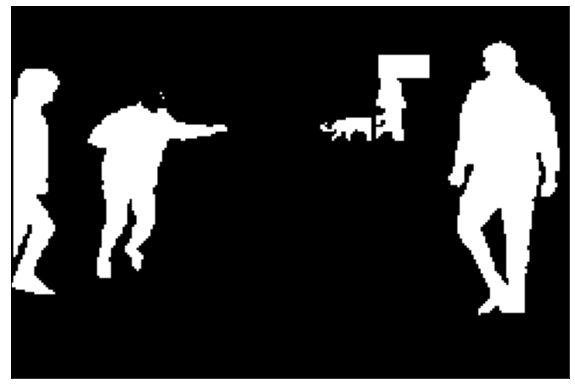

In [32]:
ret,img3_bw = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)
print(type(img3))
print(img3.size)
print(img3.shape)
plt.imshow(img3_bw,cmap='gray',vmin=0,vmax=255)
plt.rcParams["figure.figsize"]=10,10
plt.xticks([]),plt.yticks([])
plt.show()

## Find objects 

objects number is: 7


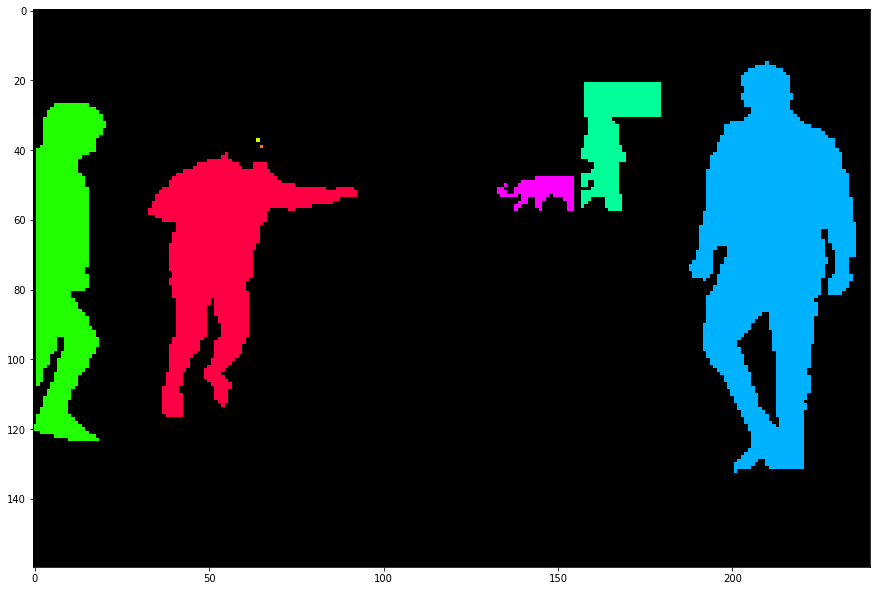

In [44]:
#find connected object
ret, labels = cv2.connectedComponents(img3_bw)

#show different colour in objects
label_hue3 = np.uint8(150 * labels / np.max(labels))

blank = 255 * np.ones_like(label_hue3)

# HSV(Hue, Saturation, and Value) conversion
labeled_img3 = cv2.merge([label_hue3, blank, blank])

#HSV to BGR
labeled_img3 = cv2.cvtColor(labeled_img3, cv2.COLOR_HSV2BGR)

#background color
labeled_img3[label_hue3 == 0] = 0

plt.imshow(labeled_img3)
print('objects number is:', ret-1)
plt.rcParams["figure.figsize"]=15,15
plt.show()